In [1]:
pip install datasets nltk


In [1]:
pip install -U datasets huggingface_hub fsspec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [2]:
pip install pandas matplotlib seaborn wordcloud plotly graphviz scikit-learn


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
from graphviz import Digraph
from datasets import load_dataset

In [4]:
from datasets import load_dataset

# Load pubmedqa dataset (we'll use the 'pqa_labeled' subset)
dataset = load_dataset("pubmed_qa", "pqa_labeled")

# Select a smaller test subset for demonstration
examples = dataset['train'].select(range(1000))  # You can increase this later


README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [5]:
import pandas as pd

# Convert to DataFrame for easier viewing
df = pd.DataFrame({
    'pubid': examples['pubid'],
    'question': examples['question'],
    'context': examples['context'],
    'final_decision': examples['final_decision'],  # Ground truth: 'yes', 'no', or 'maybe'
    'long_answer': examples['long_answer']
})

with pd.option_context('display.max_colwidth', None):
    print(df.loc[1])


pubid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [6]:
from sklearn.model_selection import train_test_split

# Assuming df is already defined with the columns: 'pubid', 'question', 'context', 'final_decision', 'long_answer'

# Split into 80% train, 20% test (you can change test_size=0.2 to something else)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Reset index (optional, but makes it cleaner)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Print sizes
print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")


Train set size: 800
Test set size: 200


In [ ]:
print(df['final_decision'].value_counts())


final_decision
yes      552
no       338
maybe    110
Name: count, dtype: int64


In [31]:
print(train_df)

        pubid                                           question  \
0    28707539  Visceral adipose tissue area measurement at a ...   
1    16195477  Production of chemokines by perivascular adipo...   
2    19481382  Is the Androgen Deficiency of Aging Men (ADAM)...   
3    22154448  Epidural analgesia for surgical treatment of p...   
4    21689015      Can dogs prime autistic children for therapy?   
..        ...                                                ...   
795  24160268      "Would a man smell a rose then throw it away?   
796  21801416  The effect of an intracerebroventricular injec...   
797  17715311  Is fetal anatomic assessment on follow-up ante...   
798  24142776  Steroids in aminoglycoside-containing ear drop...   
799  27287237  Assessment of appropriate antimicrobial prescr...   

                                               context final_decision  \
0    {'contexts': ['Measurement of visceral adipose...            yes   
1    {'contexts': ['Obesity is associ

In [32]:
with pd.option_context('display.max_colwidth', None):
    print(train_df.loc[1])


pubid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np

def compute_stats_structured(df):
    # print(df)
    q_word_counts, q_sent_counts = [], []
    c_word_counts, c_sent_counts = [], []
    a_word_counts, a_sent_counts = [], []

    for idx, row in df.iterrows():
        try:
            # Question
            # print(row)
            question = str(row['question'])

            # Context: extract from 'contexts' list inside the dict
            context_dict = row['context']
            if isinstance(context_dict, dict) and 'contexts' in context_dict:
                context = ' '.join(context_dict['contexts'])  # join list of context sentences
            else:
                context = ""

            # Long Answer: already a string
            long_answer = str(row['long_answer'])

            # Tokenize
            q_words = word_tokenize(question)
            q_sents = sent_tokenize(question)
            c_words = word_tokenize(context)
            c_sents = sent_tokenize(context)
            a_words = word_tokenize(long_answer)
            a_sents = sent_tokenize(long_answer)

            # Store stats
            q_word_counts.append(len(q_words))
            q_sent_counts.append(len(q_sents))
            c_word_counts.append(len(c_words))
            c_sent_counts.append(len(c_sents))
            a_word_counts.append(len(a_words))
            a_sent_counts.append(len(a_sents))
        except Exception as e:
            print(f"Skipping row {idx} due to error: {e}")
            continue

    return {
        "No. of Records": len(q_word_counts),
        "Question - Avg Word Count": np.mean(q_word_counts),
        "Context - Avg Word Count": np.mean(c_word_counts),
        "Answer - Avg Word Count": np.mean(a_word_counts),
        "Question - Avg Sentence Count": np.mean(q_sent_counts),
        "Context - Avg Sentence Count": np.mean(c_sent_counts),
        "Answer - Avg Sentence Count": np.mean(a_sent_counts),
    }


In [40]:
train_stats = compute_stats_structured(train_df)
test_stats = compute_stats_structured(test_df)


# df = pd.DataFrame([train_stats, val_stats, test_stats], index=["Train", "Validation", "Test"])
# df = df.round(2)
# print(df)


In [41]:
# Create DataFrame
df = pd.DataFrame([train_stats, test_stats], index=["Train", "Test"])
df = df.round(2)  # Round values for clarity

# Display the table
print(df)

       No. of Records  Question - Avg Word Count  Context - Avg Word Count  \
Train             800                      14.47                    240.45   
Test              200                      14.21                    232.70   

       Answer - Avg Word Count  Question - Avg Sentence Count  \
Train                    43.02                           1.02   
Test                     44.04                           1.00   

       Context - Avg Sentence Count  Answer - Avg Sentence Count  
Train                          9.57                         1.92  
Test                           9.46                         1.96  


In [44]:
summary_df_renamed = df.rename(columns={
    'No. of Records': 'Records',
    'Question - Avg Word Count': 'Q Word Count',
    'Context - Avg Word Count': 'C Word Count',
    'Answer - Avg Word Count': 'A Word Count',
    'Question - Avg Sentence Count': 'Q Sent Count',
    'Context - Avg Sentence Count': 'C Sent Count',
    'Answer - Avg Sentence Count': 'A Sent Count'
})

print(summary_df_renamed)


       Records  Q Word Count  C Word Count  A Word Count  Q Sent Count  \
Train      800         14.47        240.45         43.02          1.02   
Test       200         14.21        232.70         44.04          1.00   

       C Sent Count  A Sent Count  
Train          9.57          1.92  
Test           9.46          1.96  


In [45]:
print(summary_df_renamed.to_markdown())


|       |   Records |   Q Word Count |   C Word Count |   A Word Count |   Q Sent Count |   C Sent Count |   A Sent Count |
|:------|----------:|---------------:|---------------:|---------------:|---------------:|---------------:|---------------:|
| Train |       800 |          14.47 |         240.45 |          43.02 |           1.02 |           9.57 |           1.92 |
| Test  |       200 |          14.21 |         232.7  |          44.04 |           1    |           9.46 |           1.96 |


<ipython-input-15-43fcf3e5e1ac>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




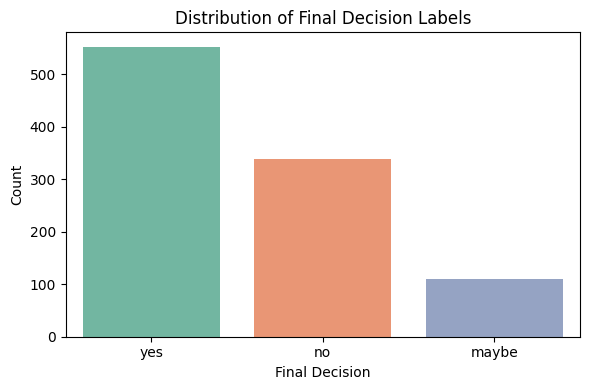

In [ ]:
# ---------------------------
# Plot 1: Distribution of Labels
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='final_decision', data=df, palette='Set2')
plt.title("Distribution of Final Decision Labels")
plt.xlabel("Final Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("label_distribution.png")
plt.show()


# Figure 4.1: Distribution of final decision labels in the PCA-labeled subset (n=1000) of the PubMedQA dataset.

# Explanation:
# This bar chart shows the distribution of yes, no, and maybe answers as annotated by human experts. The relatively balanced presence of all three labels suggests that the dataset provides a fair representation of different biomedical conclusions, which is essential for training an unbiased model.

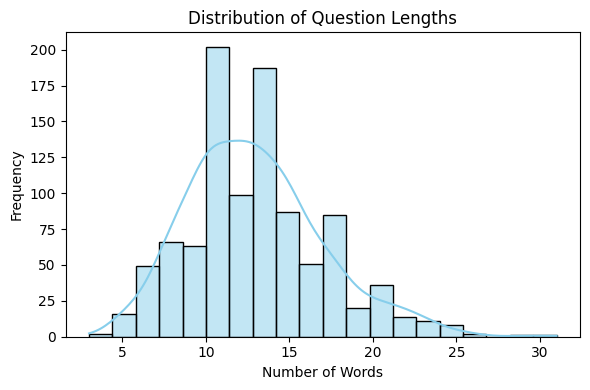

In [ ]:
# ---------------------------
# Plot 2: Question Length Distribution
# ---------------------------
df['question_length'] = df['question'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(df['question_length'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("question_length_distribution.png")
plt.show()


# Figure Caption:

# Figure 4.2: Histogram showing the distribution of question lengths (in words) in the dataset.

# Explanation:
# The histogram indicates that most biomedical questions in the dataset range between 5 and 15 words. This observation helps in choosing appropriate input sequence lengths for NLP models and supports the assumption that biomedical questions are often short and specific.



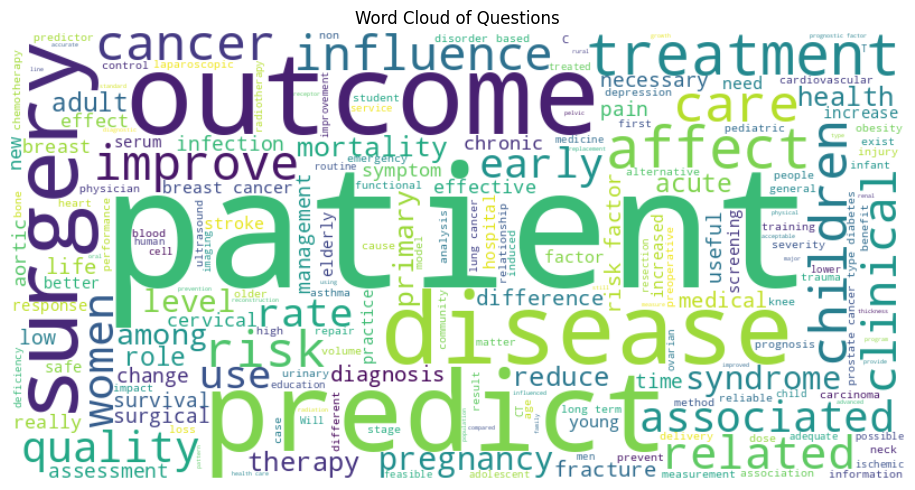

In [ ]:
# ---------------------------
# Plot 3: Word Cloud for Questions
# ---------------------------
text = " ".join(str(q) for q in df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.tight_layout()
plt.savefig("question_wordcloud.png")
plt.show()


# Figure Caption:

# Figure 4.3: Word cloud depicting the most frequent terms used in biomedical questions.

# Explanation:
# The word cloud highlights key terms such as “effect,” “treatment,” “patients,” and “risk,” reflecting the clinical focus of the dataset. Such insights are valuable for understanding the domain vocabulary and enhancing tokenization strategies for downstream tasks.

In [ ]:
# ---------------------------
# Plot 4: PCA on Bag-of-Words for Questions
# ---------------------------
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['question'].astype(str)).toarray()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

fig = px.scatter(df, x='pca-one', y='pca-two', color='final_decision',
                 title="PCA of Question Vectors Colored by Final Decision",
                 labels={"final_decision": "Label"})
fig.write_image("pca_scatter.png")
fig.show()


# Figure Caption:

# Figure 4.4: Principal Component Analysis (PCA) projection of question vectors, colored by final decision labels.

# Explanation:
# PCA was applied to high-dimensional bag-of-words vectors of questions, reducing them to two dimensions for visualization. The scatter plot reveals distinct clusters corresponding to different labels, indicating semantic separability among the classes—a promising signal for classification models.



In [ ]:
#pip install -U kaleido


<ipython-input-20-eedc7cc3751f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




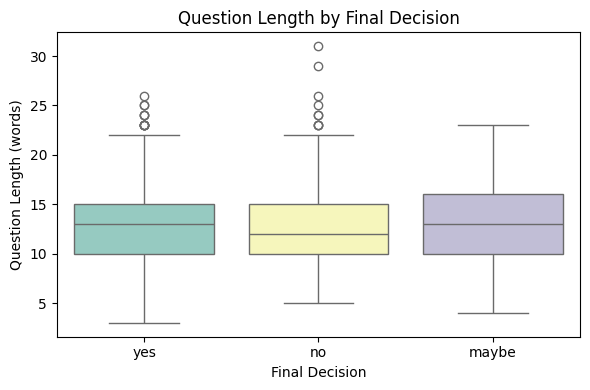

In [ ]:
# ---------------------------
# Plot 5: Heatmap of Question Length vs Label
# ---------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='final_decision', y='question_length', data=df, palette='Set3')
plt.title("Question Length by Final Decision")
plt.xlabel("Final Decision")
plt.ylabel("Question Length (words)")
plt.tight_layout()
plt.savefig("question_length_vs_label.png")
plt.show()


# Figure Caption:

# Figure 4.5: Box plot showing variation in question length across final decision categories.

# Explanation:
# This visualization compares how long questions are in each class. Interestingly, ‘maybe’ questions tend to have slightly longer lengths, possibly due to additional qualifiers or ambiguity. This trend may inform future feature engineering or model interpretation steps.



In [ ]:
# ---------------------------
# Flowchart: QA Pipeline
# ---------------------------
dot = Digraph(comment='PubMedQA Flowchart')
dot.attr(rankdir='LR', size='10')

dot.node('A', 'Load PCA-Labeled Subset (1000 Records)')
dot.node('B', 'Preprocessing (Clean Text)')
dot.node('C', 'EDA (Length, Labels, Words)')
dot.node('D', 'Visualization (Graphs, PCA, WordCloud)')
dot.node('E', 'Model Training / Explanation (Future Work)')

dot.edges(['AB', 'BC', 'CD', 'DE'])

dot.render('pubmedqa_flowchart', format='png', cleanup=False)
dot.view()

'pubmedqa_flowchart.pdf'

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Helper to extract text for context
def flatten_context(context_dict):
    return " ".join(context_dict["contexts"])

# Compute counts
def compute_text_features(df):
    df['question_word_count'] = df['question'].apply(lambda x: len(word_tokenize(x)))
    df['question_sent_count'] = df['question'].apply(lambda x: len(sent_tokenize(x)))

    df['context_word_count'] = df['context'].apply(lambda x: len(word_tokenize(flatten_context(x))))
    df['context_sent_count'] = df['context'].apply(lambda x: len(sent_tokenize(flatten_context(x))))

    df['answer_word_count'] = df['long_answer'].apply(lambda x: len(word_tokenize(x)))
    df['answer_sent_count'] = df['long_answer'].apply(lambda x: len(sent_tokenize(x)))

    return df

# Compute for both splits
train_df = compute_text_features(train_df)
test_df = compute_text_features(test_df)

# Plot histograms
def plot_histogram(data, column, title, bins=30):
    plt.figure(figsize=(3, 3))
    sns.histplot(data[column], bins=bins, kde=True, color='skyblue')
    plt.title(title)
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 🟦 Train Set Histograms
plot_histogram(train_df, 'question_word_count', 'Train: Question Word Count')
plot_histogram(train_df, 'question_sent_count', 'Train: Question Sentence Count')

plot_histogram(train_df, 'context_word_count', 'Train: Context Word Count')
plot_histogram(train_df, 'context_sent_count', 'Train: Context Sentence Count')

plot_histogram(train_df, 'answer_word_count', 'Train: Answer Word Count')
plot_histogram(train_df, 'answer_sent_count', 'Train: Answer Sentence Count')

# 🟩 Validation Set Histograms
plot_histogram(test_df, 'question_word_count', 'Validation: Question Word Count')
plot_histogram(test_df, 'question_sent_count', 'Validation: Question Sentence Count')

plot_histogram(test_df, 'context_word_count', 'Validation: Context Word Count')
plot_histogram(test_df, 'context_sent_count', 'Validation: Context Sentence Count')

plot_histogram(test_df, 'answer_word_count', 'Validation: Answer Word Count')
plot_histogram(test_df, 'answer_sent_count', 'Validation: Answer Sentence Count')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: plot_histogram() missing 1 required positional argument: 'suptitle'

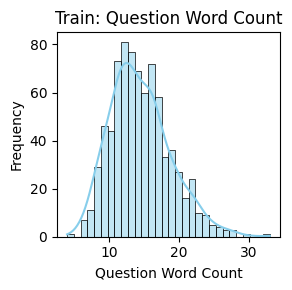

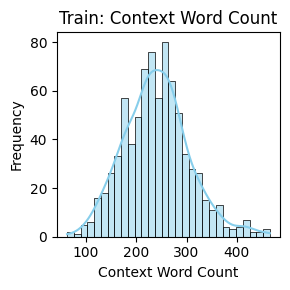

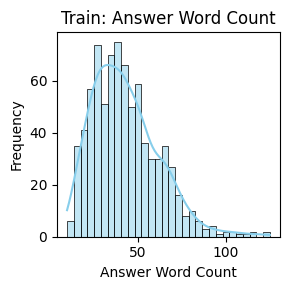

In [15]:
# 🟦 Train Set Histograms
plot_histogram(train_df, 'question_word_count', 'Train: Question Word Count')
plot_histogram(train_df, 'context_word_count', 'Train: Context Word Count')
plot_histogram(train_df, 'answer_word_count', 'Train: Answer Word Count')


In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
plot_histogram(train_df, 'question_sent_count', 'Train: Question Sentence Count')
plot_histogram(train_df, 'context_sent_count', 'Train: Context Sentence Count')
plot_histogram(train_df, 'answer_sent_count', 'Train: Answer Sentence Count')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_side_by_side_histograms(train_df, val_df, columns, titles, suptitle, bins=30):
    n = len(columns)
    plt.figure(figsize=(18, 2.5 * n))

    for idx, (col, title) in enumerate(zip(columns, titles)):
        # Train histogram
        plt.subplot(n, 2, 2 * idx + 1)
        sns.histplot(train_df[col], bins=bins, kde=True, color='steelblue')
        plt.title(f'Train: {title}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Frequency")

        # Validation histogram
        plt.subplot(n, 2, 2 * idx + 2)
        sns.histplot(val_df[col], bins=bins, kde=True, color='mediumseagreen')
        plt.title(f'Validation: {title}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Frequency")

    plt.suptitle(suptitle, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


<ipython-input-17-aeceb3665679>:24: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


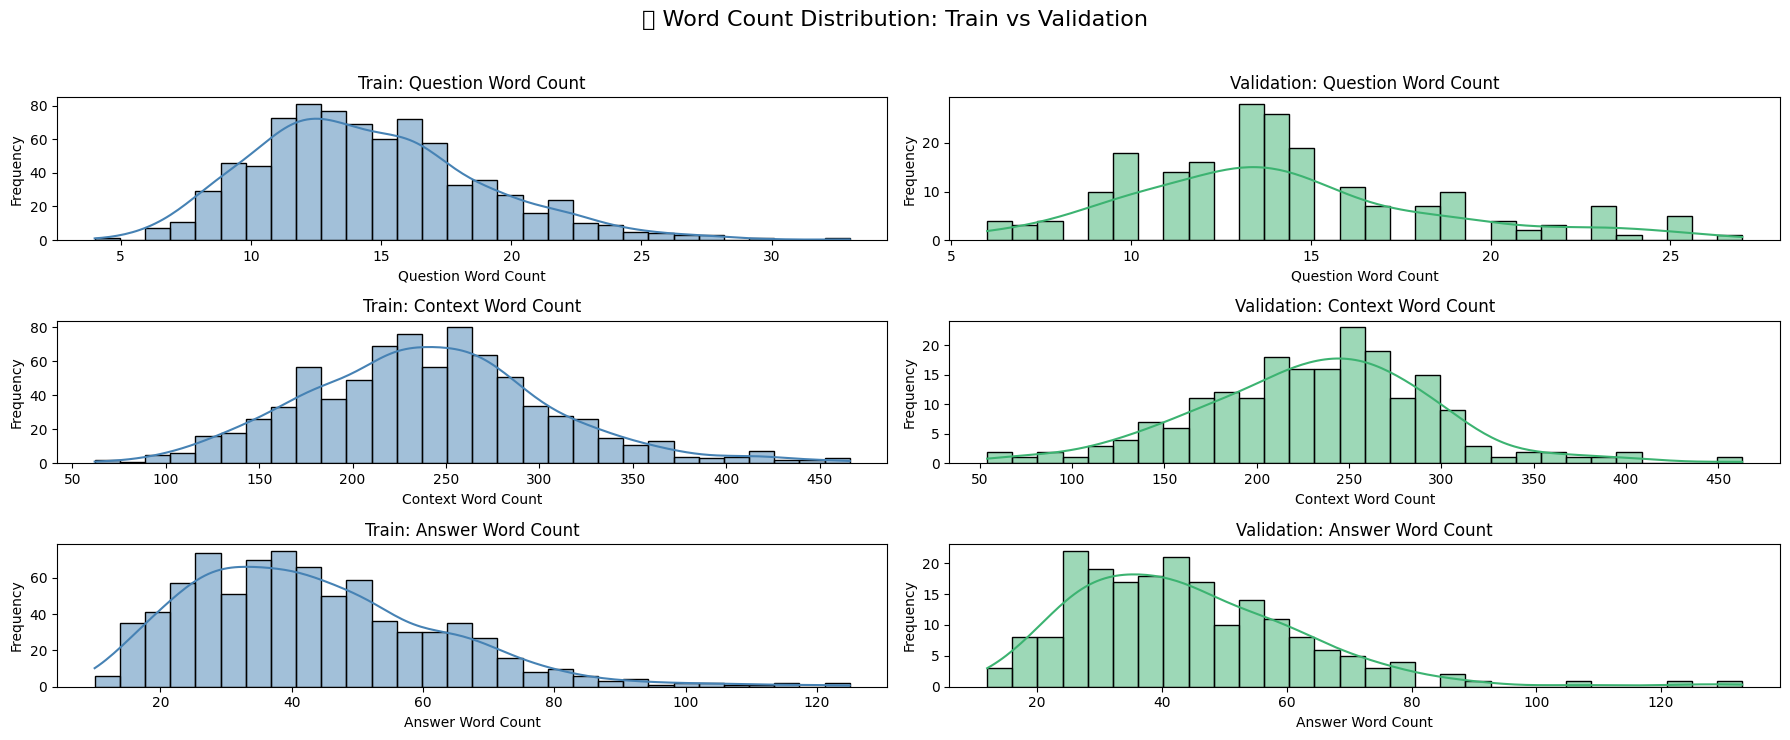

In [19]:
plot_side_by_side_histograms(
    train_df,
    test_df,
    ['question_word_count', 'context_word_count', 'answer_word_count'],
    ['Question Word Count', 'Context Word Count', 'Answer Word Count'],
    suptitle='📘 Word Count Distribution: Train vs Validation'
)


<ipython-input-17-aeceb3665679>:24: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


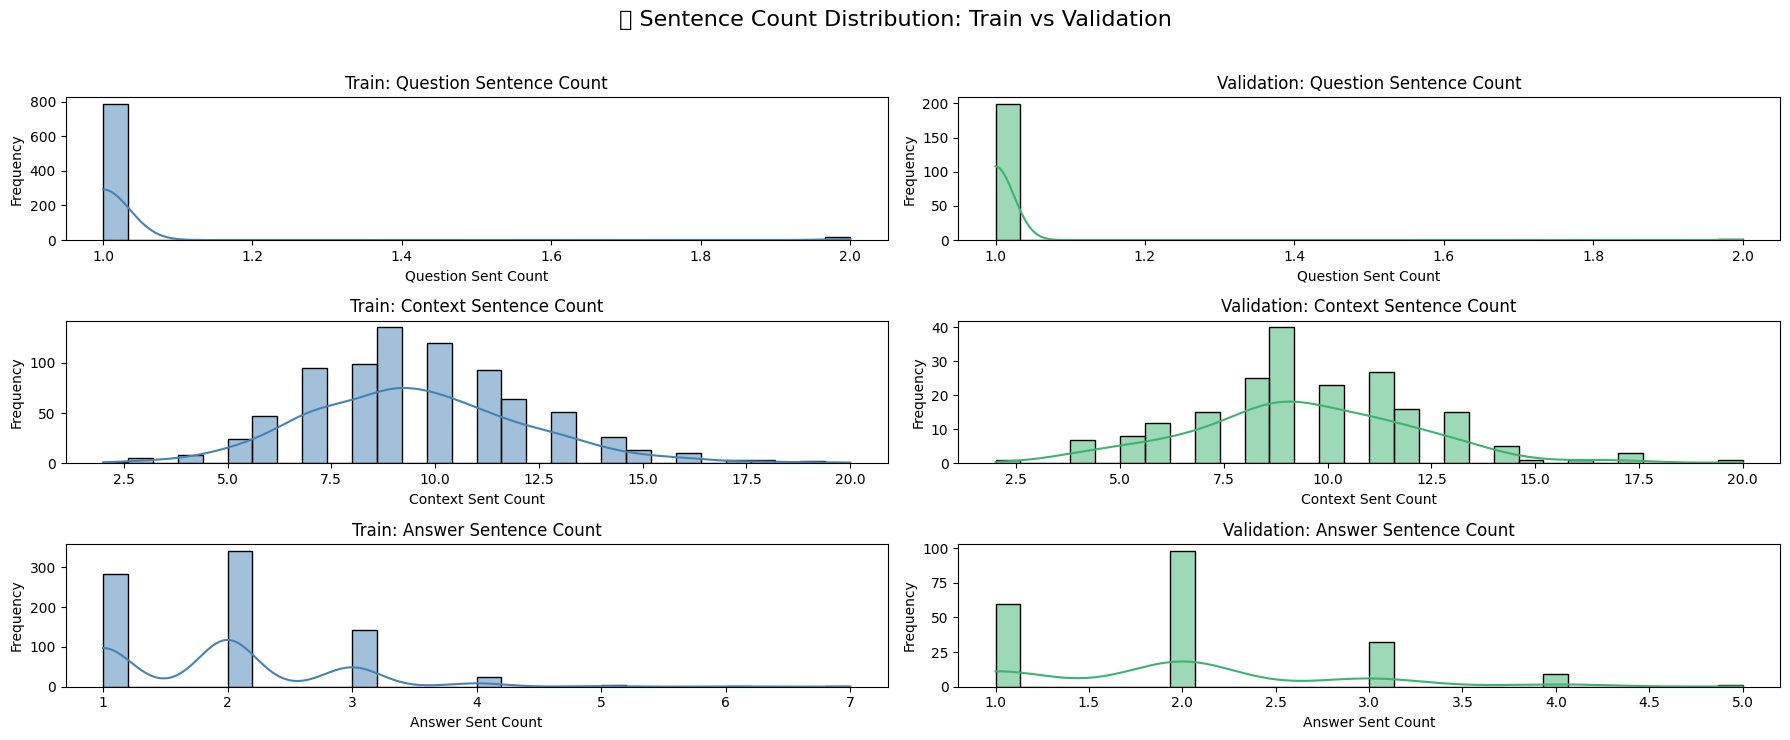

In [20]:
plot_side_by_side_histograms(
    train_df,
    test_df,
    ['question_sent_count', 'context_sent_count', 'answer_sent_count'],
    ['Question Sentence Count', 'Context Sentence Count', 'Answer Sentence Count'],
    suptitle='📗 Sentence Count Distribution: Train vs Validation'
)


In [22]:
df['long_answer'].value_counts()

,count
long_answer,
Paediatric SF medicines were not more erosive than SC medicines in vitro; a more significant predictor of their erosive potential was dose form.,1
"Results depicted mitochondrial dynamics in vivo as PCD progresses within the lace plant, and highlight the correlation of this organelle with other organelles during developmental PCD. To the best of our knowledge, this is the first report of mitochondria and chloroplasts moving on transvacuolar strands to form a ring structure surrounding the nucleus during developmental PCD. Also, for the first time, we have shown the feasibility for the use of CsA in a whole plant system. Overall, our findings implicate the mitochondria as playing a critical and early role in developmentally regulated PCD in the lace plant.",1
"Using the charts described, there was only a slight overestimation of visual acuity by the Snellen E compared to the Landolt C, even in strabismus amblyopia. Small differences in the lower visual acuity range have to be considered.",1
"""Aquagenic maladies"" could be a pediatric form of the aquagenic urticaria.",1
"Our long-term study showed significantly better (2-fold) results regarding the continence score for the abdominal approach compared with the transanal pull-through. The stool pattern and enterocolitis scores were somewhat better for the TERPT group. These findings raise an important issue about the current surgical management of HD; however, more cases will need to be studied before a definitive conclusion can be drawn.",1
...,...
"Higher MCVs and AST/ALT ratios in ASH reflect the severity of underlying liver disease and do not differentiate NASH from ASH. Instead, these biomarkers might prove useful in guiding selection of patients for liver biopsy and in targeting therapy.",1
"Trauma patients have a significant complication rate related to anticoagulation therapy, and predicting which patients will develop a complication remains unclear. Prospective studies are needed to determine which treatment regimen, if any, is appropriate to safely anticoagulate this high risk population.",1
"Findings suggest that traffic law reforms in order to have an effect on both traffic fatality and injury rates reduction require changes in police enforcement practices. Last, this case also illustrates how the diffusion of successful road safety practices globally promoted by WHO and World Bank can be an important influence for enhancing national road safety practices.",1
